In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.metrics import balanced_accuracy_score

In [5]:
file_path = '/content/HealthyPD.xlsx'
df = pd.read_excel(file_path, sheet_name='Result')
X = df[['A', 'T', 'N']]
y = df['Target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = RandomForestClassifier(
    n_estimators=100,       # Количество деревьев в лесу
    criterion="gini",        # Критерий расщепления (gini или entropy)
    max_depth=5,          # Максимальная глубина дерева (None - неограниченная)
    min_samples_split=2,     # Минимальное количество выборок для разбиения узла
    min_samples_leaf=4,      # Минимальное количество выборок в листовом узле
    random_state=42         # Для повторяемости результатов
)

In [8]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

In [9]:
y_pred = model.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)

# Генерация отчёта по результатам классификации
report = classification_report(y_test, y_pred)

# Вывод результатов
print(f"Точность модели: {accuracy:.2%}\n")
print("Классификация:")
print(report)

Точность модели: 80.73%

Классификация:
              precision    recall  f1-score   support

           0       0.82      0.70      0.75        46
           1       0.80      0.89      0.84        63

    accuracy                           0.81       109
   macro avg       0.81      0.79      0.80       109
weighted avg       0.81      0.81      0.80       109



In [11]:
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy: {balanced_acc:.4f}')

Balanced Accuracy: 0.7923


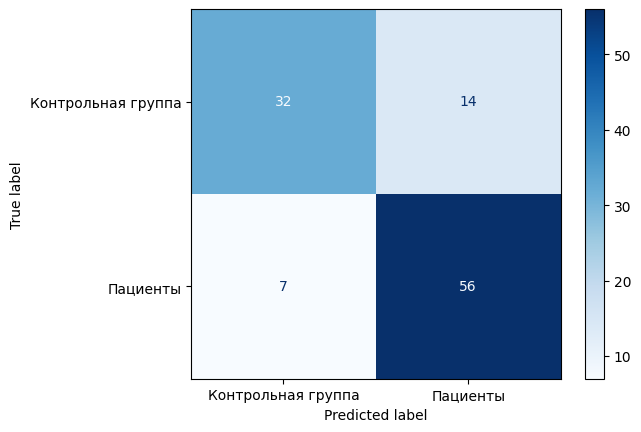

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Контрольная группа', 'Пациенты'])
disp.plot(cmap='Blues')

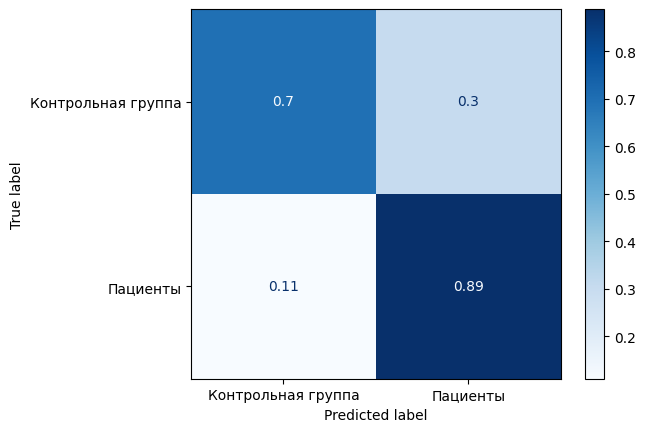

In [13]:
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Отображение нормализованной матрицы ошибок
disp = ConfusionMatrixDisplay(normalized_conf_matrix, display_labels=["Контрольная группа", "Пациенты"])
disp.plot(cmap="Blues")

In [14]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("\nЛучшие параметры:\n", best_params)

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Лучшие параметры:
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
